In [4]:
import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from nltk.tokenize import TreebankWordTokenizer

# from nltk.stem import WordNetLemmatizer


import matplotlib.pyplot as plt
from wordcloud import WordCloud

# import contractions

# import re
# import string

# import emoji

import numpy as np

from PIL import Image


### Function Declaration

In [2]:
def expand_contractions(text):
    #takes the text
    expanded = contractions.fix(text)
    #returns expanded text
    return expanded

# Function to drop links from text using regex to replace the link with a comma
def strip_links(text):
    #define the regex formula to find urls
    link_regex = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    #finds all the links in the text
    links = re.findall(link_regex, text)
    #iterates over all the links
    for link in links:
        #replace the link with a comma
        text = text.replace(link[0], ', ')
        #retuns the text without links
    return text

# Function to drop mentions from text
def strip_mentions(text):
    #Twitter mentions start with '@', we create a list with that character
    strip_sign = ['@']
    
    #for separator in  string.punctuation:
        #if separator not in strip_sign :
            #text = text.replace(separator,' ')
    # we create an empty list
    words = []
    #Iterate over each word in the text
    for word in text.split():
        #remove all leading spaces and trailing spaces in the word
        word = word.strip()
        if word:
            #check if the first character of the word is not '@'
            if word[0] not in strip_sign:
                #if False it appends the word to the list words
                words.append(word)
    #returns the text as string with all mentions removed
    return ' '.join(words)

#Function to Lemmatize the words
'''
Lemmatization is the process of reducing a variation of a word to
it's root word. For example; cooking to cook or adventurous to adventure
'''
#Create a function lemmatizer from WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def tweet_lemma(text, lemmatizer):
    
    #iterates over each word in the text and lemmatizes it
    return [lemmatizer.lemmatize(t) for t in text]    

#Function to remove stop_words
def remove_stop_words(text):
    #iterates over each word in the text
    #appends only words that are not in the english stopwords list
    return [t for t in text if t not in stopwords.words('english')]

#Function to remove emojis
def remove_emojis(text):
    #iterates over each object in the text
    #appends the objects that are not in the emoji list
    return [t for t in text if t not in emoji.UNICODE_EMOJI]

In [3]:
raw_train_df = pd.read_csv('resources/data/train.csv')

In [89]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', encoding=str)
tokenizer = TreebankWordTokenizer()
# contraction
for idx in train_df.index:
    # print(train_df.loc[idx, 'message'])
    x = contractions.fit(train_df.loc[idx,'message')
    x = tfidf_vectorizer.fit([train_df.loc[idx,'message']])
    # train_df.loc[idx, 'bow'] = tfidf_vectorizer.fit([train_df.loc[idx,'message']])
# train_df['bag_of_words'] = train_df['message'].apply(tokenizer.tokenize)

# h = tfidf_vectorizer.fit(train_df['message'])


SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (Temp/ipykernel_8304/531008655.py, line 6)

In [29]:
train_df = raw_train_df[['sentiment', 'message']].groupby('sentiment').agg(sum)
train_df['clean_msg'] = train_df['message'].apply(lambda x:expand_contractions(x))
# train_df['clean_msg']=train_df['clean_msg'].apply(lambda x: x.lower())
train_df['clean_msg']=train_df['clean_msg'].apply(lambda x:strip_links(x))
train_df['clean_msg']=train_df['clean_msg'].apply(lambda x:strip_mentions(x))
train_df['clean_msg']=train_df['clean_msg'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
train_df['clean_msg']=train_df['clean_msg'].apply(lambda x: re.sub('\w*\d\w*','', x))
train_df['clean_msg'] = train_df['clean_msg'].apply(lambda x: re.sub(' +',' ',x))
# train_df['clean_msg'] = train_df['clean_msg'].apply(remove_emojis)

# train_df['clean_msg'] = train_df['clean_msg'].apply(tweet_lemma, args=(lemmatizer, ))
# train_df['clean_msg'] = train_df['clean_msg'].apply(remove_stop_words)

train_df.index

Int64Index([-1, 0, 1, 2], dtype='int64', name='sentiment')

In [67]:
train_df.loc[[-1],'clean_msg'].values

array(['sally kohn’s latest evidence of climate change proves she is ‘not a smart person’ via need we say morerealdonaldtrump carbon tax is a globalist idea to enslave the worlds population it is the whole reason for propagating global warmingrt we had winds close to mph in the area this afternoon i would blame climate change except that this happens pr… lmao 😂 snowflakes ❄️ complaining about snowflakes ❄️ in winter global warming 🤦\u200d♂️rt this is one of arnold schwarzeneggers vehicles he is now whining about climate change how is his maidillegal or http…rt why is there snow in march if we have global warmingcan someone pls explain to me why it is in march global warming whoexplain that my global warming advocates kind of funny the professors talk shit trumpstersomg f them scientist climate change trumpserst idots kind of shows his base🤔rt new global warming study is terrible news for alarmists good news for plants animals an …cbsnews you are not going to get away with this we are g

In [ ]:
vect = TfidfVectorizer(stop_words='english',token_pattern = '[a-z]+\w*')
vecs = vect.fit_transform([train_df.loc[[0],'clean_msg'].values[0]])

feature_names = vect.get_feature_names_out()


dense = vecs.todense()
lst = dense.tolist()

df = pd.DataFrame(lst, columns=feature_names)
# train_df['clean_msg'] = train_df['clean_msg'].apply(tweet_lemma, args=(lemmatizer, ))

df = df.T.sum(axis=1)
x = []
for word in df.index:
    x.append(lemmatizer.lemmatize(word))
print(len(df.index))
print(len(x))
# df.index = x
# df.index
print([i for i in df.index if i not in x])
# train_df['clean_msg'].to_csv('grouped_sentiment.csv', index=True) 

In [73]:
x = pd.read_csv('sent_1.csv',index_col='sentiment')

Text(0.5, 1.0, 'Common Words')

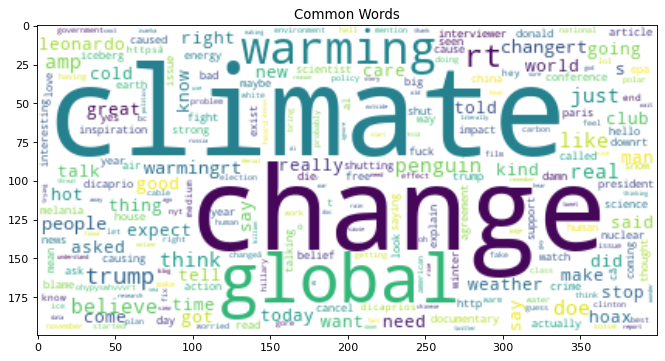

In [94]:
cloud = WordCloud(background_color= 'white', max_words=400).generate_from_frequencies(df)

plt.figure(figsize = (10,6), dpi=80)

plt.imshow(cloud, interpolation='bilinear')
plt.title('Common Words')


In [55]:
train_df

,sentiment,message,tweetid,bag_of_words
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221,"[PolySciMajor, EPA, chief, does, n't, think, carbon, dioxide, is, main, cause, of, global, warming, and.., wait, ,, what, !, ?, https, :, //t.co/yeLvcEFXkC, via, @, mashable]"
1,1,It's not like we lack evidence of anthropogenic global warming,126103,"[It, 's, not, like, we, lack, evidence, of, anthropogenic, global, warming]"
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562,"[RT, @, RawStory, :, Researchers, say, we, have, three, years, to, act, on, climate, change, before, it’s, too, late, https, :, //t.co/WdT0KdUr2f, https, :, //t.co/Z0ANPT…]"
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,"[#, TodayinMaker, #, WIRED, :, 2016, was, a, pivotal, year, in, the, war, on, climate, change, https, :, //t.co/44wOTxTLcD]"
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954,"[RT, @, SoyNovioDeTodas, :, It, 's, 2016, ,, and, a, racist, ,, sexist, ,, climate, change, denying, bigot, is, leading, in, the, polls., #, ElectionNight]"
...,...,...,...,...
15814,1,"RT @ezlusztig: They took down the material on global warming, LGBT rights, and health care. But now they're hocking Melania's QVC. https://…",22001,"[RT, @, ezlusztig, :, They, took, down, the, material, on, global, warming, ,, LGBT, rights, ,, and, health, care., But, now, they, 're, hocking, Melania, 's, QVC., https, :, //…]"
15815,2,RT @washingtonpost: How climate change could be breaking up a 200-million-year-old relationship https://t.co/rPFGvb2pLq,17856,"[RT, @, washingtonpost, :, How, climate, change, could, be, breaking, up, a, 200-million-year-old, relationship, https, :, //t.co/rPFGvb2pLq]"
15816,0,notiven: RT: nytimesworld :What does Trump actually believe about climate change? Rick Perry joins other aides in … https://t.co/0Mp2,384248,"[notiven, :, RT, :, nytimesworld, :, What, does, Trump, actually, believe, about, climate, change, ?, Rick, Perry, joins, other, aides, in, …, https, :, //t.co/0Mp2]"
15817,-1,RT @sara8smiles: Hey liberals the climate change crap is a hoax that ties to #Agenda2030.\r\nThe Climate is Being Changed byÃ¢â‚¬Â¦,819732,"[RT, @, sara8smiles, :, Hey, liberals, the, climate, change, crap, is, a, hoax, that, ties, to, #, Agenda2030., The, Climate, is, Being, Changed, byÃ¢â‚¬Â¦]"


In [57]:
x = train_df[['sentiment', 'bag_of_words']].groupby('sentiment').agg(sum)
x

,bag_of_words
sentiment,
-1,"[Sally, Kohn’s, latest, evidence, of, climate, change, proves, she, is, ‘not, a, smart, person’, https, :, //t.co/MhkzoGL9Vt, via, @, twitchyteam, Need, we, say, more, @, realDonaldTrump, Carbon, Tax, is, a, Globalist, idea, to, enslave, the, world, 's, population., It, is, the, whole, reason, for, propagating, global, warming, !, RT, @, SteveSGoddard, :, We, had, winds, close, to, 100, MPH, in, the, area, this, afternoon., I, would, blame, climate, change, ,, except, that, this, happens, pr…, @, MissLizzyNJ, lmao, 😂, snowflakes, ❄️, complaining, about, snowflakes, ❄️, in, winter, =global, warming, 🤦‍♂️, RT, @, Dawn2334Dawn, :, This, is, ONE, of, Arnold, Schwarzenegger, ...]"
0,"[Calum, :, *tweets, abt, reunitingish, w, the, cast*, -sees, replies, begging, him, to, come, to, their, countries-, Calum, :, *goes, back, to, rting, climate, change*, we, also, met, this, guy, ,, he, let, us, in, on, some, truth, about, climate, change, and, gay, people, not, existing, https, :, //t.co/Q7yOMcMZaj, @, Jnp_Ftw, are, these, the, same, scientists, that, denounce, climate, change, ?, It, 's, not, a, choice, We’, ve, dealt, with, simple, issues, like, climate, change, and, energy, policy., Now, the, complex, issues., Mal, vs, Tones., #, qanda, RT, @, andrewsharp, :, Win, probability, is, bullshit, man., I, saw, the, NBA, ...]"
1,"[PolySciMajor, EPA, chief, does, n't, think, carbon, dioxide, is, main, cause, of, global, warming, and.., wait, ,, what, !, ?, https, :, //t.co/yeLvcEFXkC, via, @, mashable, It, 's, not, like, we, lack, evidence, of, anthropogenic, global, warming, #, TodayinMaker, #, WIRED, :, 2016, was, a, pivotal, year, in, the, war, on, climate, change, https, :, //t.co/44wOTxTLcD, RT, @, SoyNovioDeTodas, :, It, 's, 2016, ,, and, a, racist, ,, sexist, ,, climate, change, denying, bigot, is, leading, in, the, polls., #, ElectionNight, Worth, a, read, whether, you, do, or, do, n't, believe, in, climate, change, https, :, //t.co/ggLZVNYjun, https, :, //t.co/7AFE2mAH8j, ...]"
2,"[RT, @, RawStory, :, Researchers, say, we, have, three, years, to, act, on, climate, change, before, it’s, too, late, https, :, //t.co/WdT0KdUr2f, https, :, //t.co/Z0ANPT…, RT, @, tveitdal, :, We, only, have, a, 5, percent, chance, of, avoiding, ‘dangerous’, global, warming, ,, a, study, finds, https, :, //t.co/xUBTqNxhkK, https, :, //t.co/of…, Fossil, fuel, giant, ExxonMobil, ‘misled’, the, public, about, climate, change, ,, Harvard, academics, conclude, https, :, //t.co/ofc2WSu4EX, Bangladesh, confronting, climate, change, head, on, https, :, //t.co/MTqeNBQDUt, https, :, //t.co/itgkUxgEfg, RT, @, latimes, :, Atmospheric, rivers, fueled, by, climate, change, could, decimate, wild, oysters, in, San, Francisco, Bay, https, :, ...]"


In [41]:
type(x)

pandas.core.frame.DataFrame

In [18]:
mask = np.array(Image.open('resources/imgs/callout_1.png'))

# mask

def transform_format(val):
    if val == 0:
        return 255
    else:
        return val


trans_mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)


for k in range(len(mask)):
    # print(mask[k])
    trans_mask[k] = list(map(transform_format,mask[k]))

In [19]:
trans_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])